In [1]:
import numpy as np
import pandas as pd

# Load parameters and dataset

In [2]:
parameters = pd.read_csv('../data/i3PCF_sobol_training_2.6e5_nodes_part1.csv')

parameters

,Omega_m,A_s,w0,h,z,c_min
0,0.460424,1.660429e-09,-0.448337,0.889134,0.526256,5.069300
1,0.164073,5.256174e-09,-2.549402,0.636170,2.288480,2.994849
2,0.270179,3.456163e-09,-1.412331,0.737546,1.621062,0.609466
3,0.355081,6.252506e-09,-3.274889,0.652936,1.194285,4.059184
4,0.303968,2.716942e-09,-1.947522,0.704793,0.888568,5.578121
...,...,...,...,...,...,...
262139,0.303970,4.370100e-09,-2.888037,0.572479,1.852476,3.968100
262140,0.355078,1.660376e-09,-2.334765,0.607469,1.533497,5.497163
262141,0.270180,5.256130e-09,-0.668392,0.871607,0.651394,2.050381
262142,0.164073,3.456214e-09,-3.488377,0.680308,0.128017,1.728482


In [3]:
P_l_data = np.load('../data/P_nl_grids_l80_shear_x_shear_COSMOGRIDV1_fiducial_no_neutrinos_i3PCF_sobol_training_2.6e5_nodes_part1.npy')

P_l_data.shape

(262144, 80)

In [4]:
l_array = np.unique(np.logspace(np.log10(2), np.log10(15000), 88).astype(int))

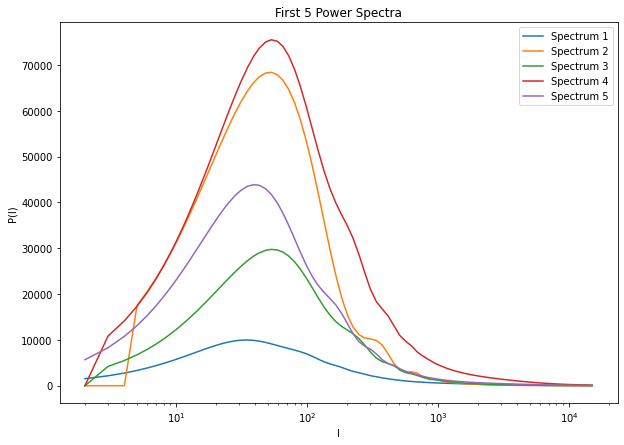

    Omega_m           A_s        w0         h         z     c_min
0  0.460424  1.660429e-09 -0.448337  0.889134  0.526256  5.069300
1  0.164073  5.256174e-09 -2.549402  0.636170  2.288480  2.994849
2  0.270179  3.456163e-09 -1.412331  0.737546  1.621062  0.609466
3  0.355081  6.252506e-09 -3.274889  0.652936  1.194285  4.059184
4  0.303968  2.716942e-09 -1.947522  0.704793  0.888568  5.578121


In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
# Plot the first 5 power spectra
for i in range(5):
    plt.plot(l_array, P_l_data[i], label=f'Spectrum {i+1}')

plt.xlabel('l')
plt.ylabel('P(l)')
plt.title('First 5 Power Spectra')
plt.xscale('log')
plt.legend()
plt.show()

# Display the corresponding cosmological parameters
print(parameters.head(5))

In [6]:
parameters[:]

,Omega_m,A_s,w0,h,z,c_min
0,0.460424,1.660429e-09,-0.448337,0.889134,0.526256,5.069300
1,0.164073,5.256174e-09,-2.549402,0.636170,2.288480,2.994849
2,0.270179,3.456163e-09,-1.412331,0.737546,1.621062,0.609466
3,0.355081,6.252506e-09,-3.274889,0.652936,1.194285,4.059184
4,0.303968,2.716942e-09,-1.947522,0.704793,0.888568,5.578121
...,...,...,...,...,...,...
262139,0.303970,4.370100e-09,-2.888037,0.572479,1.852476,3.968100
262140,0.355078,1.660376e-09,-2.334765,0.607469,1.533497,5.497163
262141,0.270180,5.256130e-09,-0.668392,0.871607,0.651394,2.050381
262142,0.164073,3.456214e-09,-3.488377,0.680308,0.128017,1.728482


In [7]:
parameters.shape

(262144, 6)

# Split data into training, testing and validation sets

In [68]:
# Split the parameters into training, testing and validation sets (70-15-15)

parameters_training_data = parameters[:][:int(0.7*parameters.shape[0])].to_numpy()
parameters_testing_data = parameters[:][int(0.7*parameters.shape[0]):int(0.85*parameters.shape[0])].to_numpy()
parameters_validation_data = parameters[:][int(0.85*parameters.shape[0]):].to_numpy()

In [69]:
# Split the data into training, testing and validation sets (70-15-15)

P_l_training_data = P_l_data[:int(0.7*P_l_data.shape[0])]
P_l_testing_data = P_l_data[int(0.7*P_l_data.shape[0]):int(0.85*P_l_data.shape[0])]
P_l_validation_data = P_l_data[int(0.85*P_l_data.shape[0]):]

In [70]:
parameters_training_data.shape

(183500, 6)

In [71]:
P_l_training_data.shape

(183500, 80)

In [72]:
# standardize the target training P_l_data

mean_P_l_training_data = np.mean(P_l_training_data, axis=0)
std_P_l_training_data = np.std(P_l_training_data, axis=0)

P_l_training_data_standardized = (P_l_training_data - mean_P_l_training_data) / std_P_l_training_data

In [73]:
# standardize the target validation P_l_data

mean_P_l_validation_data = np.mean(P_l_validation_data, axis=0)
std_P_l_validation_data = np.std(P_l_validation_data, axis=0)

P_l_validation_data_standardized = (P_l_validation_data - mean_P_l_validation_data) / std_P_l_validation_data

In [74]:
(mean_P_l_training_data - mean_P_l_validation_data) / mean_P_l_validation_data

array([-5.76065231e-04, -2.95119675e-04, -7.22728256e-04,  1.74767149e-04,
        6.84813199e-05,  2.29999095e-04,  2.99745969e-04,  3.00297203e-04,
        2.62367273e-04,  2.20432551e-04,  1.67238404e-04,  4.94872605e-05,
        1.04958796e-05, -5.73914127e-05, -1.21584208e-04, -1.65239409e-04,
       -2.02221332e-04, -2.46433110e-04, -3.15478217e-04, -3.76719656e-04,
       -3.88135672e-04, -3.53759694e-04, -3.56550543e-04, -3.99155315e-04,
       -4.04992968e-04, -3.70070501e-04, -3.18752476e-04, -2.77659870e-04,
       -2.97236166e-04, -3.14348841e-04, -2.36991097e-04, -1.40058984e-04,
       -1.51878585e-04, -2.24839426e-04, -1.76323424e-04, -1.08920681e-04,
       -1.04245848e-04, -7.12000233e-05, -1.26452947e-04, -1.96209025e-04,
       -1.57056139e-04, -2.59919472e-05,  4.99922005e-06,  4.34217502e-06,
       -9.82359382e-05, -1.61214729e-04, -1.81071565e-04, -1.09649495e-04,
       -3.24362835e-05, -1.44295410e-04, -2.75700225e-04, -2.21158078e-04,
       -1.69732565e-04, -

In [75]:
(std_P_l_training_data - std_P_l_validation_data) / std_P_l_validation_data

array([-2.96548346e-03, -2.68813883e-03, -1.33460495e-03, -2.90311280e-04,
        3.48698980e-04,  6.55069266e-04,  7.35168220e-04,  6.95317885e-04,
        5.98713210e-04,  4.83979259e-04,  3.69883640e-04,  1.83646796e-04,
        9.98297905e-05, -6.87483654e-05, -2.22033783e-04, -3.63512756e-04,
       -4.87680252e-04, -5.76597519e-04, -6.55640896e-04, -6.76005100e-04,
       -6.77843669e-04, -7.23769201e-04, -7.62318941e-04, -7.32007793e-04,
       -6.39917965e-04, -5.07443175e-04, -4.18130247e-04, -2.91471032e-04,
       -4.12075261e-05,  1.71965559e-04,  2.60426771e-04,  1.92774812e-04,
        8.59480762e-05,  3.12096451e-05,  1.07189430e-05,  8.29019707e-05,
        2.90460001e-04,  2.99222502e-04,  1.94229948e-04,  1.50384950e-04,
        1.81667804e-04,  2.63597286e-04,  2.86307282e-04,  1.83558262e-04,
        1.68771357e-04,  1.44688935e-04,  7.79616321e-05,  5.90885608e-05,
        3.07647902e-05, -3.73679165e-05, -5.15187947e-05, -1.25638788e-04,
       -1.51242320e-04, -

In [76]:
P_l_training_data_standardized

array([[-0.30973527, -0.38312712, -0.43423351, ...,  0.14895146,
         0.15955758,  0.16848407],
       [-0.34123097, -0.42339383, -0.48298226, ...,  0.05830052,
         0.08358801,  0.10541541],
       [-0.34123097, -0.3450674 , -0.38581744, ...,  0.11151796,
         0.12588276,  0.13848258],
       ...,
       [ 7.52959962,  7.73278951,  7.45474136, ...,  0.01552092,
         0.04566108,  0.07192547],
       [-0.22312315, -0.27619328, -0.30845487, ...,  0.06066051,
         0.08455452,  0.10521042],
       [-0.34123097, -0.277224  , -0.30162426, ...,  0.32034813,
         0.29905064,  0.28109434]])

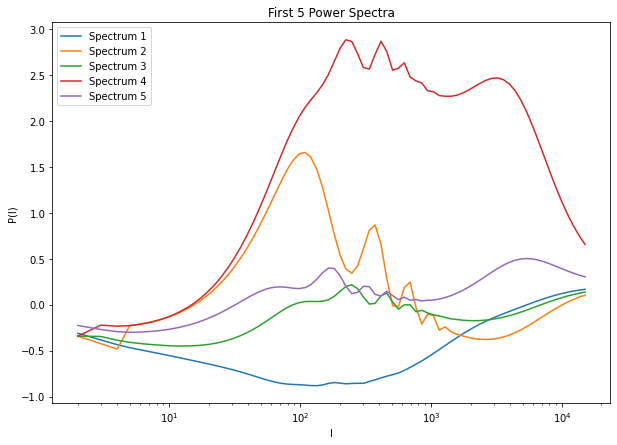

    Omega_m           A_s        w0         h         z     c_min
0  0.460424  1.660429e-09 -0.448337  0.889134  0.526256  5.069300
1  0.164073  5.256174e-09 -2.549402  0.636170  2.288480  2.994849
2  0.270179  3.456163e-09 -1.412331  0.737546  1.621062  0.609466
3  0.355081  6.252506e-09 -3.274889  0.652936  1.194285  4.059184
4  0.303968  2.716942e-09 -1.947522  0.704793  0.888568  5.578121


In [77]:
# Plot the first 5 standardized power spectra
plt.figure(figsize=(10, 7))
for i in range(5):
    plt.plot(l_array, P_l_training_data_standardized[i], label=f'Spectrum {i+1}')

plt.xlabel('l')
plt.ylabel('P(l)')
plt.title('First 5 Power Spectra')
plt.xscale('log')
plt.legend()
plt.show()

# Display the corresponding cosmological parameters
print(parameters.head(5))

# Create Neural Network model to learn the mapping from parameters to training data

In [8]:
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler

In [9]:
class autoScalingDataset(torch.utils.data.Dataset):
    '''
    Prepare the dataset for regression
    '''

    def __init__(self, X, y, scale_data=True):
        if not torch.is_tensor(X) and not torch.is_tensor(y):
            # Apply scaling if necessary
            if scale_data:
                scaler_X = StandardScaler()
                scaler_y = StandardScaler()

            X = scaler_X.fit_transform(X)
            y = scaler_y.fit_transform(y)

            self.scaler_X_mean = scaler_X.mean_
            self.scaler_X_var = scaler_X.var_
            self.scaler_y_mean = scaler_y.mean_
            self.scaler_y_var = scaler_y.var_

            self.X = torch.from_numpy(X)
            self.y = torch.from_numpy(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
    def __getitem_mean_var__(self):
        return self.scaler_X_mean, self.scaler_X_var, self.scaler_y_mean, self.scaler_y_var

In [10]:
class manualScalingDataset(torch.utils.data.Dataset):
  '''
  Prepare the dataset for regression
  '''

  def __init__(self, X, y, scaler_X_mean, scaler_X_var, scaler_y_mean, scaler_y_var, scale_data=True):
    if not torch.is_tensor(X) and not torch.is_tensor(y):
      # Apply scaling if necessary
      if scale_data:
          X = (X - scaler_X_mean) / np.sqrt(scaler_X_var)
          y = (y - scaler_y_mean) / np.sqrt(scaler_y_var)

      self.X = torch.from_numpy(X)
      self.y = torch.from_numpy(y)
      
  def __len__(self):
      return len(self.X)

  def __getitem__(self, i):
      return self.X[i], self.y[i]

In [47]:
training_data = autoScalingDataset(parameters[:][:int(0.6*parameters.shape[0])].to_numpy(), P_l_data[:][:int(0.6*P_l_data.shape[0])], scale_data=True)

X_mean, X_var, y_mean, y_var = training_data.__getitem_mean_var__()

np.save('./models/scaler_X_mean.npy', X_mean)
np.save('./models/scaler_X_var.npy', X_var)
np.save('./models/scaler_y_mean.npy', y_mean)
np.save('./models/scaler_y_var.npy', y_var)

validation_data = manualScalingDataset(parameters[:][int(0.6*parameters.shape[0]):int(0.8*parameters.shape[0])].to_numpy(), P_l_data[:][int(0.6*P_l_data.shape[0]):int(0.8*P_l_data.shape[0])], X_mean, X_var, y_mean, y_var, scale_data=True)
test_data = manualScalingDataset(parameters[:][int(0.8*parameters.shape[0]):].to_numpy(), P_l_data[:][int(0.8*P_l_data.shape[0]):], X_mean, X_var, y_mean, y_var, scale_data=True)

In [59]:
trainLoader = torch.utils.data.DataLoader(training_data, batch_size=256, shuffle=True, num_workers=0)
validationLoader = torch.utils.data.DataLoader(validation_data, batch_size=256, shuffle=True, num_workers=0)
testLoader = torch.utils.data.DataLoader(test_data, batch_size=800000, shuffle=False, num_workers=0)

In [13]:
'''
#parameters_P_l_training_data_torch = GalaxyEmulatorDataset(parameters[:][:int(0.1*parameters.shape[0])].to_numpy(), P_l_data[:][:int(0.1*parameters.shape[0])], scale_data=True)

parameters_P_l_training_data_torch = GalaxyEmulatorDataset(parameters[:][:int(0.6*parameters.shape[0])].to_numpy(), P_l_data[:][:int(0.6*P_l_data.shape[0])],
                                                           parameters[:][int(0.6*parameters.shape[0]):int(0.8*parameters.shape[0])].to_numpy(), P_l_data[int(0.6*P_l_data.shape[0]):int(0.87*P_l_data.shape[0])], 
                                                           parameters[:][int(0.8*parameters.shape[0]):].to_numpy(), P_l_data[int(0.8*P_l_data.shape[0]):],
                                                           scale_data=True)


trainloader = torch.utils.data.DataLoader(parameters_P_l_training_data_torch, batch_size=256, shuffle=True, num_workers=0)

print(trainloader.dataset.X.shape, trainloader.dataset.y.shape, trainloader.dataset.X_test.shape, trainloader.dataset.y_test.shape)
'''


'\n#parameters_P_l_training_data_torch = GalaxyEmulatorDataset(parameters[:][:int(0.1*parameters.shape[0])].to_numpy(), P_l_data[:][:int(0.1*parameters.shape[0])], scale_data=True)\n\nparameters_P_l_training_data_torch = GalaxyEmulatorDataset(parameters[:][:int(0.6*parameters.shape[0])].to_numpy(), P_l_data[:][:int(0.6*P_l_data.shape[0])],\n                                                           parameters[:][int(0.6*parameters.shape[0]):int(0.8*parameters.shape[0])].to_numpy(), P_l_data[int(0.6*P_l_data.shape[0]):int(0.87*P_l_data.shape[0])], \n                                                           parameters[:][int(0.8*parameters.shape[0]):].to_numpy(), P_l_data[int(0.8*P_l_data.shape[0]):],\n                                                           scale_data=True)\n\n\ntrainloader = torch.utils.data.DataLoader(parameters_P_l_training_data_torch, batch_size=256, shuffle=True, num_workers=0)\n\nprint(trainloader.dataset.X.shape, trainloader.dataset.y.shape, trainloader.datase

In [13]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(6, 64),
      nn.ReLU(),
      nn.Linear(64, 128),
      nn.ReLU(),
      nn.Linear(128, 80)
    )

  def forward(self, x):
    '''
      Forward pass
    '''
    return self.layers(x)

Starting epoch 1
Average training loss after epoch   615: 0.624
Starting epoch 2
Average training loss after epoch   615: 0.362
Starting epoch 3
Average training loss after epoch   615: 0.310
Starting epoch 4
Average training loss after epoch   615: 0.283
Starting epoch 5
Average training loss after epoch   615: 0.263
Starting epoch 6
Average training loss after epoch   615: 0.248
Starting epoch 7
Average training loss after epoch   615: 0.235
Starting epoch 8
Average training loss after epoch   615: 0.224
Starting epoch 9
Average training loss after epoch   615: 0.214
Starting epoch 10
Average training loss after epoch   615: 0.205
Starting epoch 11
Average training loss after epoch   615: 0.195
Starting epoch 12
Average training loss after epoch   615: 0.186
Starting epoch 13
Average training loss after epoch   615: 0.178
Starting epoch 14
Average training loss after epoch   615: 0.170
Starting epoch 15
Average training loss after epoch   615: 0.162
Starting epoch 16
Average training

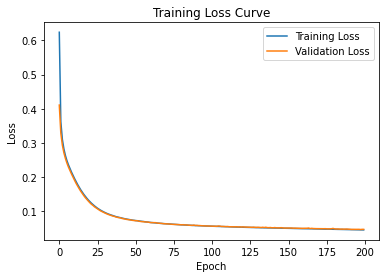

Training process has finished.


In [15]:
# Set fixed random number seed
torch.manual_seed(42)

# Initialize the MLP
mlp = MLP()

# Define the loss function and optimizer
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

# Initialize the list to store losses
losses = []
validation_losses = []

num_epochs = 200

max_validation_loss = 1e10

# Run the training loop
for epoch in range(0, num_epochs):
  # Print epoch
  print(f'Starting epoch {epoch+1}')

  mlp.train(True)

  # Set current loss value
  current_loss = 0.0

  # Iterate over the DataLoader for training data
  for i, data in enumerate(trainLoader, 0):
    # Get and prepare inputs
    inputs, targets = data
    inputs, targets = inputs.float(), targets.float()

    # Zero the gradients
    optimizer.zero_grad()

    # Perform forward pass
    outputs = mlp(inputs)

    # Compute loss
    loss = loss_function(outputs, targets)

    # Perform backward pass
    loss.backward()

    # Perform optimization
    optimizer.step()

    # Print statistics
    current_loss += loss.item()
    # if i % 100 == 0:
    #   print('Loss after mini-batch %5d: %.3f' %
    #       (i + 1, current_loss / 500))
    #   current_loss = 0.0

  # Append the loss for the current epoch
  #losses.append(current_loss)

  avg_current_loss = current_loss / (i + 1)
  print('Average training loss after epoch %5d: %.3f' % (i + 1, avg_current_loss))

  losses.append(avg_current_loss)

  mlp.eval()

  current_validation_loss = 0.0

  with torch.no_grad():
    for j, data_v in enumerate(validationLoader, 0):
      inputs_v, targets_v = data_v
      inputs_v, targets_v = inputs_v.float(), targets_v.float()

      outputs_v = mlp(inputs_v)

      loss_v = loss_function(outputs_v, targets_v)
      current_validation_loss += loss_v.item()

    avg_validation_loss = current_validation_loss / (j + 1)

    validation_losses.append(avg_validation_loss)

    torch.save(mlp.state_dict(), f'./models/mlp_model_{epoch}.pth')

    if avg_validation_loss < max_validation_loss:
      max_validation_loss = avg_validation_loss
      torch.save(mlp.state_dict(), f'./models/mlp_model_best.pth')

# Plot the loss curve
plt.plot(losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

# Process is complete.
print('Training process has finished.')

# Load the model

In [14]:
# load the best model

model = MLP()
mlp_best = torch.load('./models/mlp_model_best.pth', weights_only=True)
model.load_state_dict(mlp_best)
model.eval()



/Users/ahalder/software/miniconda3/lib/python3.8/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


MLP(
  (layers): Sequential(
    (0): Linear(in_features=6, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=80, bias=True)
  )
)

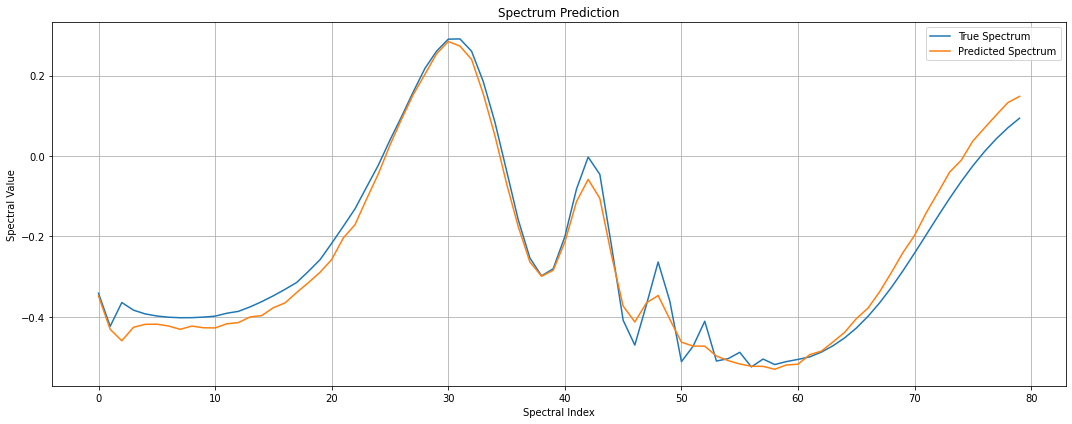

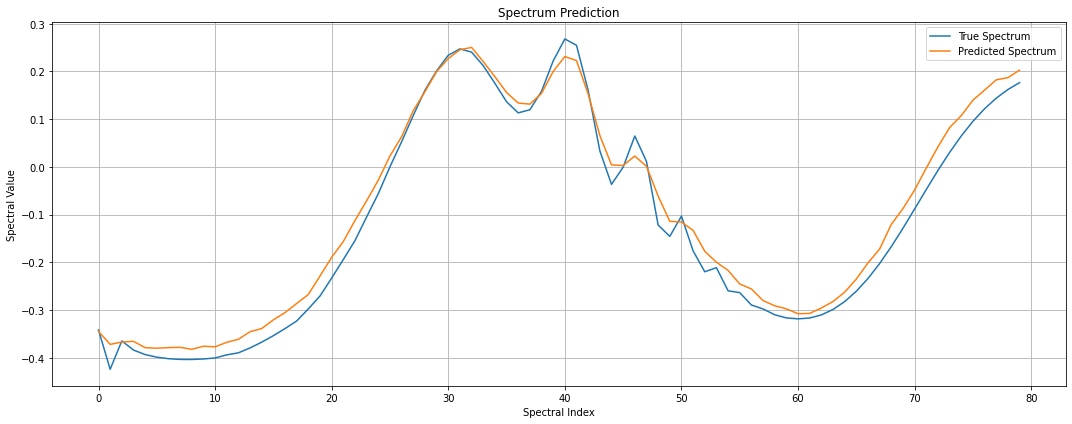

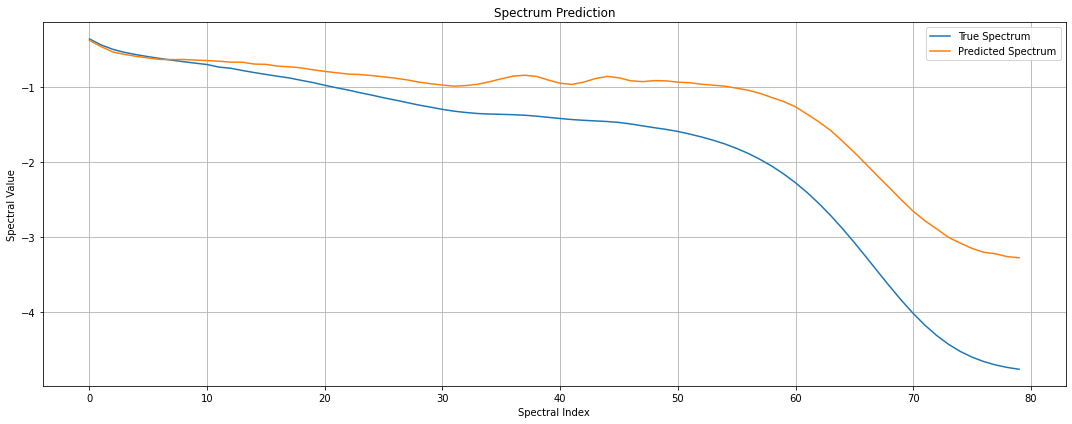

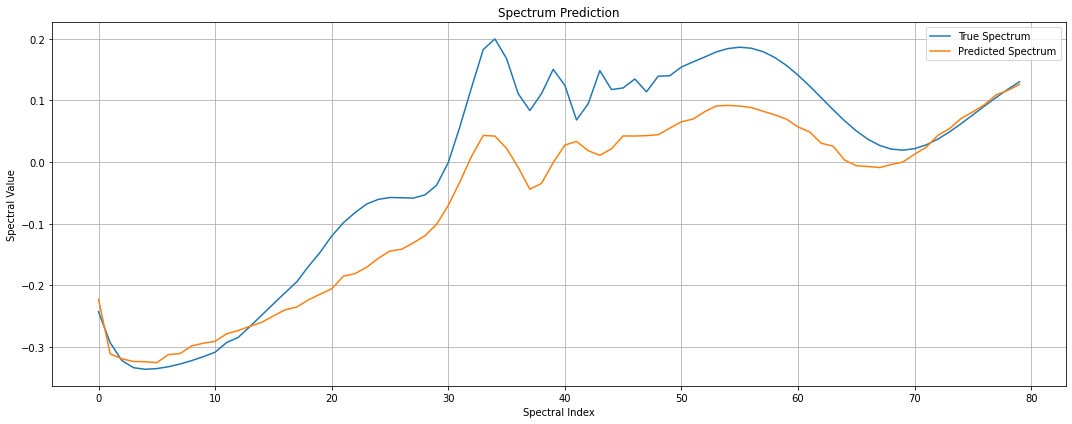

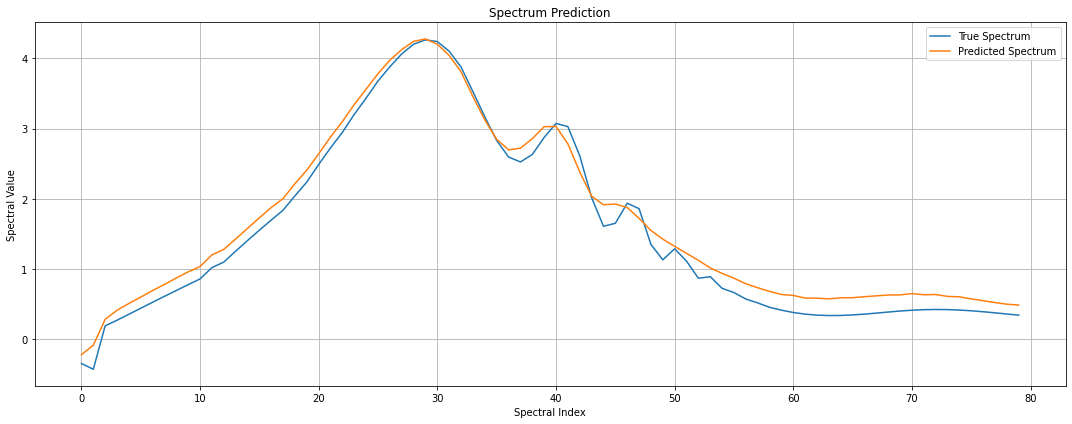

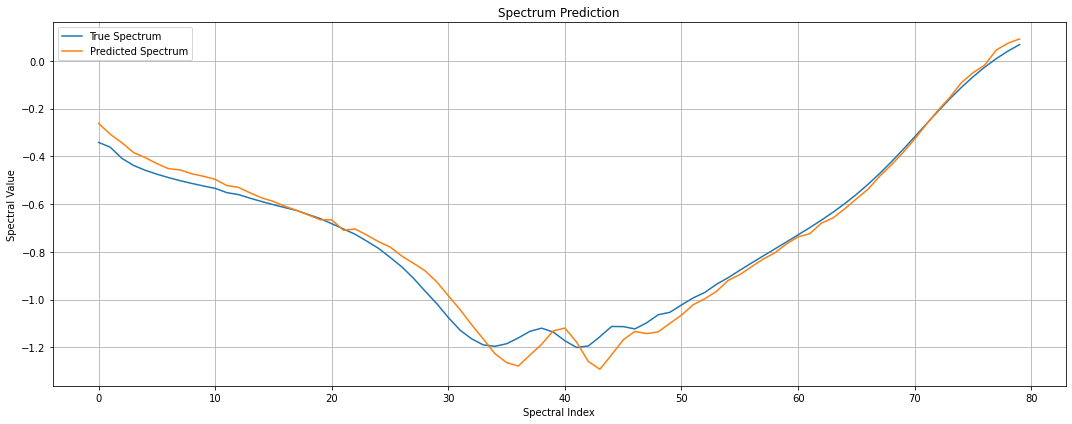

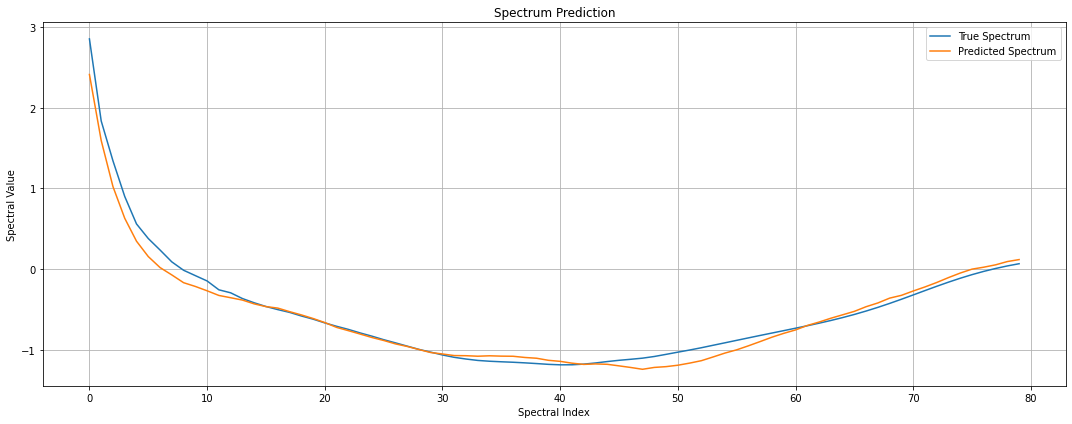

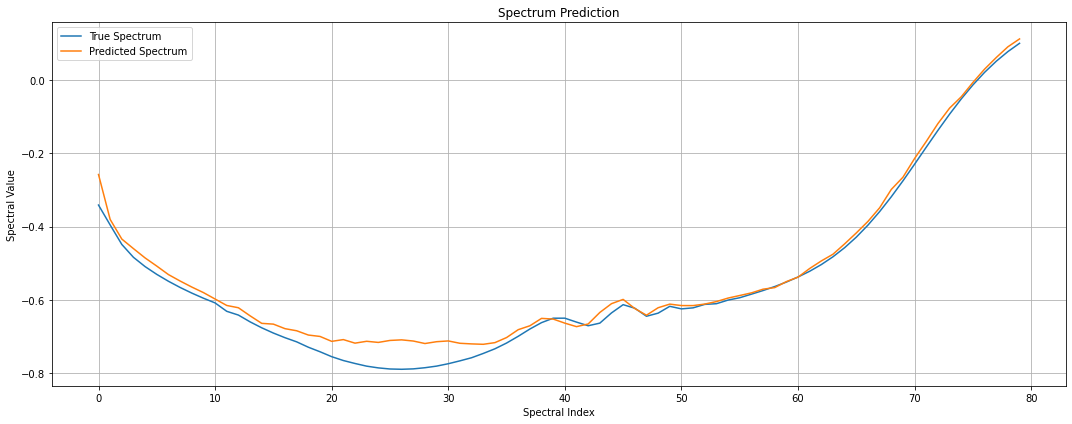

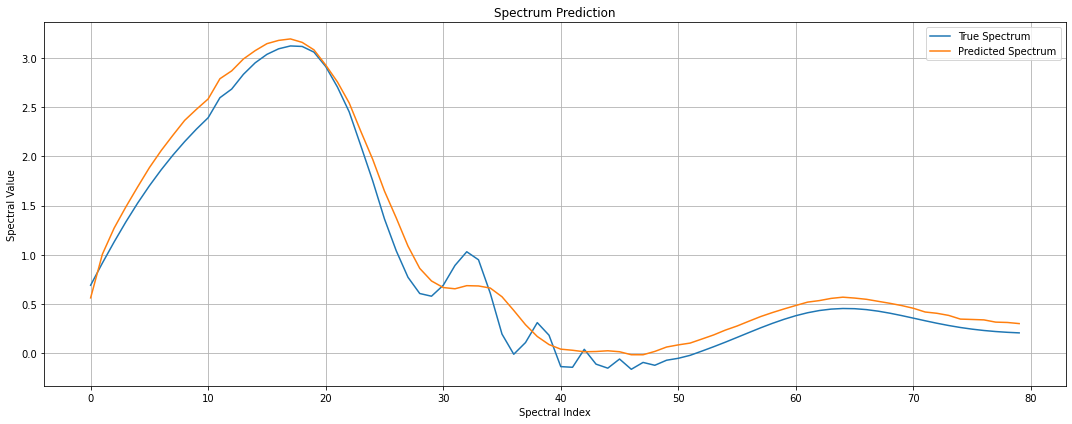

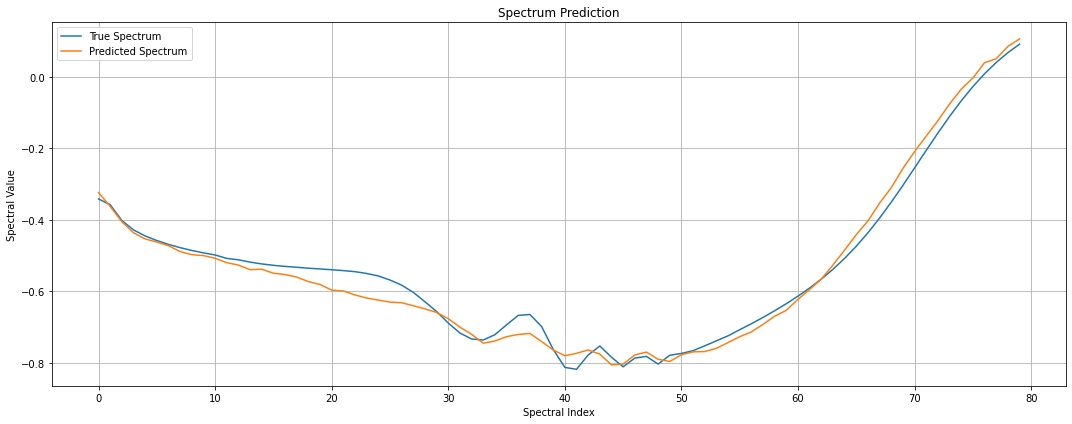

In [80]:
def plot_spectrum_prediction(model, input_row, output_row=None,
                              input_scaler=None,
                              output_scaler=None,
                              is_pytorch=False,
                              title="Spectrum Prediction"):
    """
    Generate and plot spectrum prediction with proper scaling.
    
    Parameters:
    - model: Trained model (PyTorch or RandomForest)
    - input_row: Single input row to generate prediction
    - input_scaler: Optional scaler for input normalization
    - output_scaler: Optional scaler for output denormalization
    - is_pytorch: Flag to indicate PyTorch or sklearn model
    - title: Plot title
    """
    # Prepare input
    if input_scaler is not None:
        input_row_scaled = input_scaler.transform(input_row.reshape(1, -1))
    else:
        input_row_scaled = input_row.reshape(1, -1)
    
    # Generate prediction based on model type
    if is_pytorch:
        # PyTorch model prediction
        model.eval()
        with torch.no_grad():
            input_tensor = torch.FloatTensor(input_row_scaled)
            prediction = model(input_tensor).numpy()
    else:
        # Sklearn model prediction
        prediction = model.predict(input_row_scaled)
    
    # Denormalize prediction if scaler is provided
    if output_scaler is not None:
        prediction = output_scaler.inverse_transform(prediction)
    
    # Flatten prediction in case of multi-dimensional array
    prediction = prediction.flatten()
    
    # Plot the spectrum
    plt.figure(figsize=(15, 6))
    plt.plot(output_row, label='True Spectrum')
    plt.plot(prediction, label='Predicted Spectrum')
    plt.title(title)
    plt.xlabel('Spectral Index')
    plt.ylabel('Spectral Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig('spectrum_prediction.png')
    plt.show()
 
    return prediction
 
for i in range(110,120):
    spectrum = plot_spectrum_prediction(
        model,
        testLoader.dataset.X[i].float(),
        output_row=testLoader.dataset.y[i].float(),
        input_scaler=None,
        output_scaler=None,
        is_pytorch=True)

In [60]:
testLoader.dataset.y.shape

torch.Size([52429, 80])

In [61]:
model.eval()
predictions = []

with torch.no_grad():
    for data in testLoader:
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()

        outputs = model(inputs)
        
        predictions.append(outputs.numpy())


# Convert predictions to numpy array
predictions = np.vstack(predictions)

'''
# Plot the first 5 predictions against the true values
for i in range(5):
    plt.plot(l_array, targets[i].numpy(), label='True Spectrum')
    plt.plot(l_array, predictions[i], label='Predicted Spectrum')
    plt.xlabel('l')
    plt.ylabel('P(l)')
    plt.title(f'Spectrum {i+1}')
    plt.xscale('log')
    plt.legend()
    plt.show()
'''

"\n# Plot the first 5 predictions against the true values\nfor i in range(5):\n    plt.plot(l_array, targets[i].numpy(), label='True Spectrum')\n    plt.plot(l_array, predictions[i], label='Predicted Spectrum')\n    plt.xlabel('l')\n    plt.ylabel('P(l)')\n    plt.title(f'Spectrum {i+1}')\n    plt.xscale('log')\n    plt.legend()\n    plt.show()\n"

In [62]:
mean_squared_errors = np.mean((predictions - testLoader.dataset.y.numpy())**2, axis=0)

mean_squared_errors.shape

(80,)

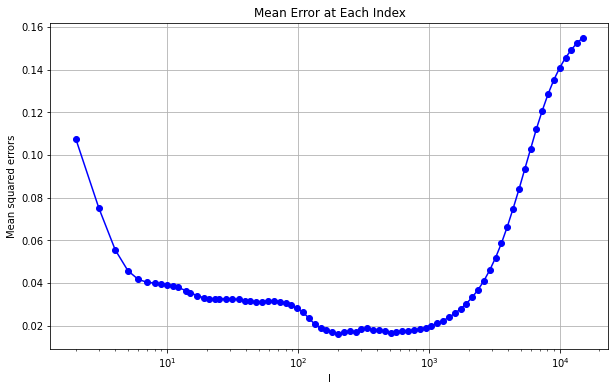

In [63]:
# plot the mean error at each index
plt.figure(figsize=(10, 6))
plt.plot(l_array, mean_squared_errors, marker='o', linestyle='-', color='b')
plt.xlabel('l')
plt.ylabel('Mean squared errors')
plt.xscale('log')
plt.title('Mean Error at Each Index')
plt.grid(True)
plt.show()

